In [23]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [25]:
import gzip
import pickle

X,y = pickle.load(gzip.open('flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [26]:
NAME = "model".format(int(time.time()))
print(NAME)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=3e-4),
              metrics=["accuracy"])
model.summary()

model
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)        

In [27]:
loss = model.fit(X, y, epochs=10, validation_split=0.25)  

Epoch 1/10
235/235 [==============================] - 19s 79ms/step - loss: 1.4580 - accuracy: 0.3509 - val_loss: 1.2935 - val_accuracy: 0.4308
Epoch 2/10
235/235 [==============================] - 19s 79ms/step - loss: 1.2127 - accuracy: 0.4588 - val_loss: 1.0581 - val_accuracy: 0.5240
Epoch 3/10
235/235 [==============================] - 19s 79ms/step - loss: 0.9543 - accuracy: 0.5671 - val_loss: 0.7648 - val_accuracy: 0.6764
Epoch 4/10
235/235 [==============================] - 18s 77ms/step - loss: 0.6618 - accuracy: 0.7221 - val_loss: 0.4837 - val_accuracy: 0.8304
Epoch 5/10
235/235 [==============================] - 16s 66ms/step - loss: 0.4427 - accuracy: 0.8229 - val_loss: 0.3009 - val_accuracy: 0.8964
Epoch 6/10
235/235 [==============================] - 17s 70ms/step - loss: 0.3176 - accuracy: 0.8805 - val_loss: 0.2170 - val_accuracy: 0.9336
Epoch 7/10
235/235 [==============================] - 19s 81ms/step - loss: 0.2325 - accuracy: 0.9184 - val_loss: 0.1437 - val_accuracy:

In [28]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 99.18%


<AxesSubplot:>

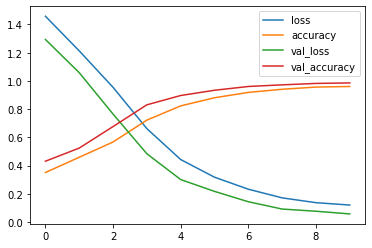

In [29]:
pd.DataFrame(loss.history).plot()

<AxesSubplot:>

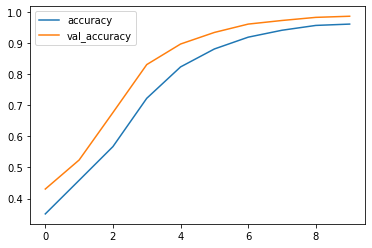

In [30]:
pd.DataFrame(loss.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

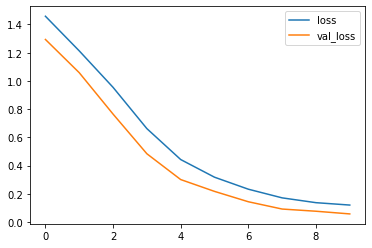

In [31]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [32]:
model.save('model2.h5')

In [ ]:
from google.colab import files
files.download('model2.h5')